In [1]:
import os
from classes.GAN import improvedGAN
#from utils.callbacks import WandbImagesGAN

import torch
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import MNIST
from torchvision.transforms import Compose,ToTensor,Resize,PILToTensor
from torchvision.io import read_image
from torchsummary import summary


from torch import distributions as D
import wandb

from imutils import paths
import matplotlib.pyplot as plt
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: matteoferrante (use `wandb login --relogin` to force relogin)


True

In [2]:
discriminator_architecture=[[1,256],[1,256]]
generator_architecture=[[1,128],[1,128]]

latent_dim=24
input_dim=(3,128,128)

BS=64
INIT_LR=1e-4
EPOCHS=20

config={}
config["latent_dim"]=latent_dim
config["input_dim"]=input_dim


In [3]:
model=improvedGAN(latent_dim=latent_dim,target_shape=(1,28,28),discriminator_architecture=discriminator_architecture,generator_architecture=generator_architecture)

C:\Users\matte\anaconda3\envs\ai_pytorch\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [4]:
summary(model.generator,(latent_dim,),device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 6272]         156,800
   ConvTranspose2d-2          [-1, 128, 14, 14]         262,272
             PReLU-3          [-1, 128, 14, 14]               1
            Conv2d-4          [-1, 128, 14, 14]         147,584
       BatchNorm2d-5          [-1, 128, 14, 14]             256
            Conv2d-6          [-1, 128, 14, 14]         147,584
       BatchNorm2d-7          [-1, 128, 14, 14]             256
              ReLU-8          [-1, 128, 14, 14]               0
            Conv2d-9          [-1, 128, 14, 14]         147,584
      BatchNorm2d-10          [-1, 128, 14, 14]             256
        LeakyReLU-11          [-1, 128, 14, 14]               0
    ResidualBlock-12          [-1, 128, 14, 14]               0
ConvTransposeResBlock-13          [-1, 128, 14, 14]               0
  ConvTranspose2d-14          [-1, 

In [5]:
summary(model.discriminator,(1,28,28),device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 256, 14, 14]           4,352
            Conv2d-2          [-1, 256, 14, 14]         590,080
       BatchNorm2d-3          [-1, 256, 14, 14]             512
            Conv2d-4          [-1, 256, 14, 14]         590,080
       BatchNorm2d-5          [-1, 256, 14, 14]             512
              ReLU-6          [-1, 256, 14, 14]               0
            Conv2d-7          [-1, 256, 14, 14]         590,080
       BatchNorm2d-8          [-1, 256, 14, 14]             512
         LeakyReLU-9          [-1, 256, 14, 14]               0
    ResidualBlock-10          [-1, 256, 14, 14]               0
     ConvResBlock-11          [-1, 256, 14, 14]               0
           Conv2d-12            [-1, 256, 7, 7]       1,048,832
           Conv2d-13            [-1, 256, 7, 7]         590,080
      BatchNorm2d-14            [-1, 25

In [6]:
transform=Compose([ToTensor()])

train_dataset=MNIST('mnist_train', train=True, download=True,
                             transform=transform)
test_dataset=MNIST('mnist_test', train=False, download=True,
                             transform=transform)



C:\Users\matte\anaconda3\envs\ai_pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
train_dataloader=DataLoader(train_dataset,batch_size=BS,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=BS,shuffle=True)


In [8]:
base_path="models/improved_gan_mnist"
os.makedirs(base_path,exist_ok=True)

In [9]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

wandb.init(project="NeuroGEN_Pytorch",config=config)

Using cuda device


wandb: wandb version 0.12.9 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 0: 100%|████████████████████████████████████████████████████████████████████| 938/938 [02:51<00:00,  5.47batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


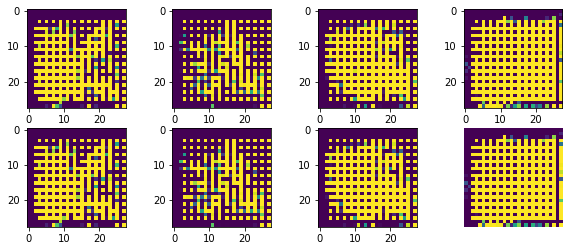

Epoch 1: 100%|████████████████████████████████████████████████████████████████████| 938/938 [02:57<00:00,  5.28batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


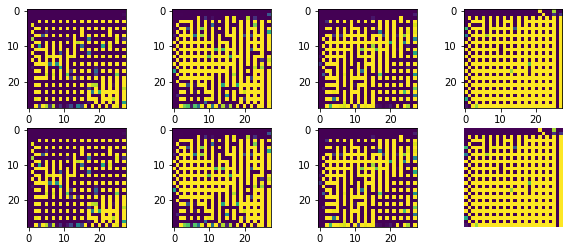

Epoch 2: 100%|████████████████████████████████████████████████████████████████████| 938/938 [02:58<00:00,  5.26batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


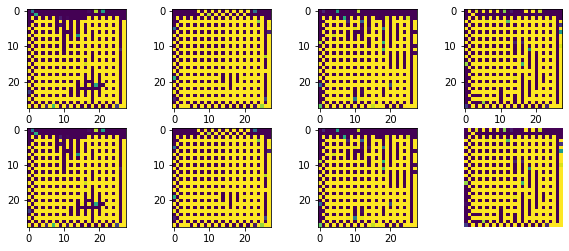

Epoch 3: 100%|████████████████████████████████████████████████████████████████████| 938/938 [02:58<00:00,  5.24batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


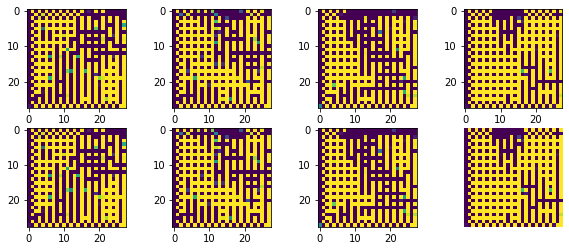

Epoch 4: 100%|████████████████████████████████████████████████████████████████████| 938/938 [02:59<00:00,  5.23batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


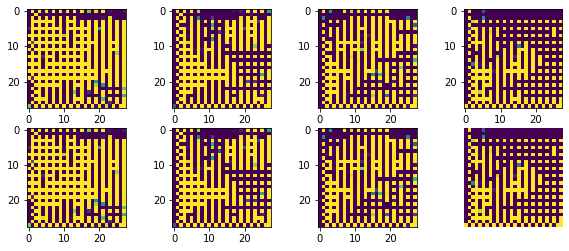

Epoch 5: 100%|████████████████████████████████████████████████████████████████████| 938/938 [03:00<00:00,  5.21batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


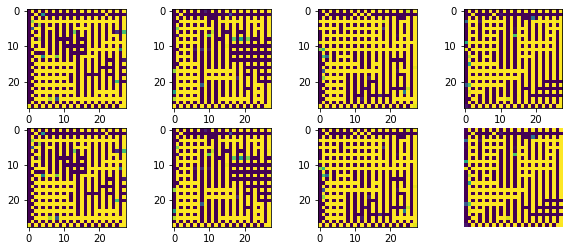

Epoch 6: 100%|████████████████████████████████████████████████████████████████████| 938/938 [02:59<00:00,  5.22batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


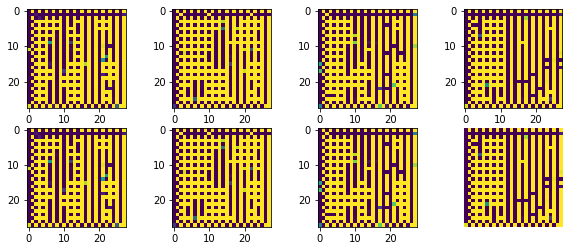

Epoch 7: 100%|████████████████████████████████████████████████████████████████████| 938/938 [02:59<00:00,  5.23batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


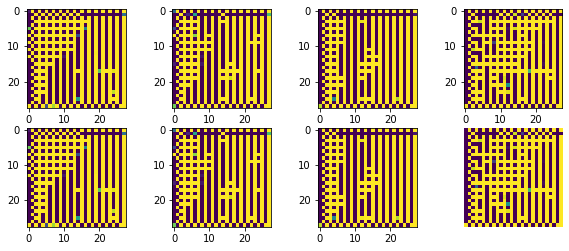

Epoch 8: 100%|████████████████████████████████████████████████████████████████████| 938/938 [03:00<00:00,  5.20batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


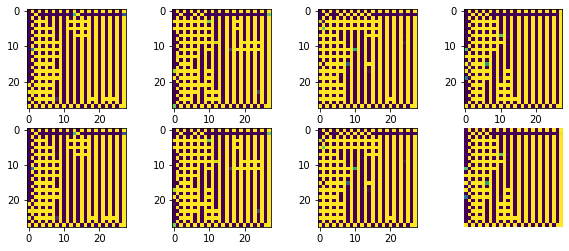

Epoch 9: 100%|████████████████████████████████████████████████████████████████████| 938/938 [03:01<00:00,  5.18batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


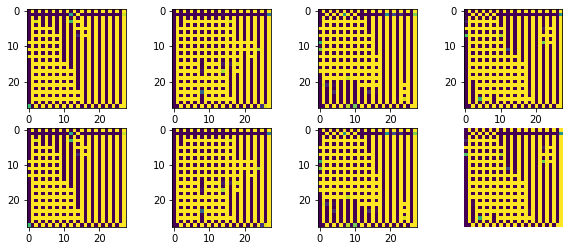

Epoch 10: 100%|███████████████████████████████████████████████████████████████████| 938/938 [03:00<00:00,  5.19batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


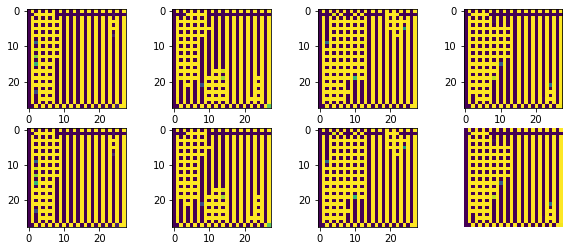

Epoch 11: 100%|███████████████████████████████████████████████████████████████████| 938/938 [02:58<00:00,  5.24batch/s]


(100, 28, 28, 1) (100, 28, 28, 1)


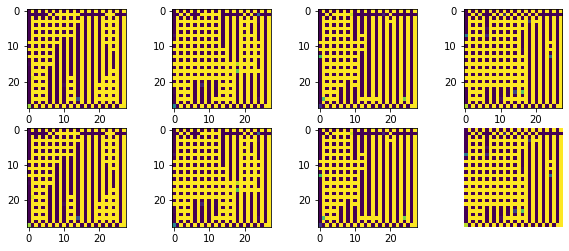

Epoch 12:  26%|█████████████████▎                                                 | 243/938 [00:46<02:12,  5.24batch/s]


KeyboardInterrupt: 

In [10]:

g_optimizer=torch.optim.Adam(model.generator.parameters(),lr=INIT_LR)
d_optimizer=torch.optim.Adam(model.discriminator.parameters(),lr=INIT_LR)

model.to(device)

model.fit(train_dataloader=train_dataloader,epochs=EPOCHS,g_optimizer=g_optimizer,d_optimizer=d_optimizer,device=device,wandb_log=True,save_model=base_path,early_stop=3)